# Static Visualization of relative cases and vaccination rate over time

### Relative COVID cases in Africa, Germany and India

In [2]:
#import all the required libraries

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go

import webbrowser as web

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',1000)
mpl.rcParams['figure.figsize'] = (16, 9)
sns.set(style="darkgrid")

# Data Preparation

In [3]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
raw_country_data=pd.read_csv(url)
raw_country_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
raw_country_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
#get required columns from all columns
required_columns = ['location','date','total_cases','population']
cases_data = raw_country_data[required_columns]
cases_data.head()

,location,date,total_cases,population
0,Afghanistan,2020-02-24,5.0,39835428.0
1,Afghanistan,2020-02-25,5.0,39835428.0
2,Afghanistan,2020-02-26,5.0,39835428.0
3,Afghanistan,2020-02-27,5.0,39835428.0
4,Afghanistan,2020-02-28,5.0,39835428.0


In [6]:
# add new column for cases/population for each country
cases_data['cases_per_population'] = cases_data['total_cases'] / cases_data['population']
cases_data.head()

c:\Users\Atharva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,date,total_cases,population,cases_per_population
0,Afghanistan,2020-02-24,5.0,39835428.0,1.255164e-07
1,Afghanistan,2020-02-25,5.0,39835428.0,1.255164e-07
2,Afghanistan,2020-02-26,5.0,39835428.0,1.255164e-07
3,Afghanistan,2020-02-27,5.0,39835428.0,1.255164e-07
4,Afghanistan,2020-02-28,5.0,39835428.0,1.255164e-07


In [7]:
#Slicing data for 3 countries

required_countries = ['Africa','Germany','India']
three_country_data = cases_data.loc[cases_data['location'].isin(required_countries)].reset_index(drop=True)
three_country_data.head()

,location,date,total_cases,population,cases_per_population
0,Africa,2020-02-13,NaN,1.373486e+09,NaN
1,Africa,2020-02-14,1.0,1.373486e+09,7.280742e-10
2,Africa,2020-02-15,1.0,1.373486e+09,7.280742e-10
3,Africa,2020-02-16,1.0,1.373486e+09,7.280742e-10
4,Africa,2020-02-17,1.0,1.373486e+09,7.280742e-10


In [8]:
#restructure data
three_country_data = three_country_data.pivot(index='date', columns='location', values='cases_per_population')
three_country_data = three_country_data.reset_index().rename_axis(None, axis=1)
three_country_data

,date,Africa,Germany,India
0,2020-01-27,NaN,1.191888e-08,NaN
1,2020-01-28,NaN,4.767554e-08,NaN
2,2020-01-29,NaN,4.767554e-08,NaN
3,2020-01-30,NaN,4.767554e-08,7.176644e-10
4,2020-01-31,NaN,5.959442e-08,7.176644e-10
...,...,...,...,...
878,2022-06-23,0.008745,3.299359e-01,3.111957e-02
879,2022-06-24,0.008750,3.310007e-01,3.113101e-02
880,2022-06-25,0.008754,3.310007e-01,3.113944e-02
881,2022-06-26,0.008757,3.310102e-01,3.115169e-02


Text(0.5, 1.0, 'Total cases wrt to the poulation size')

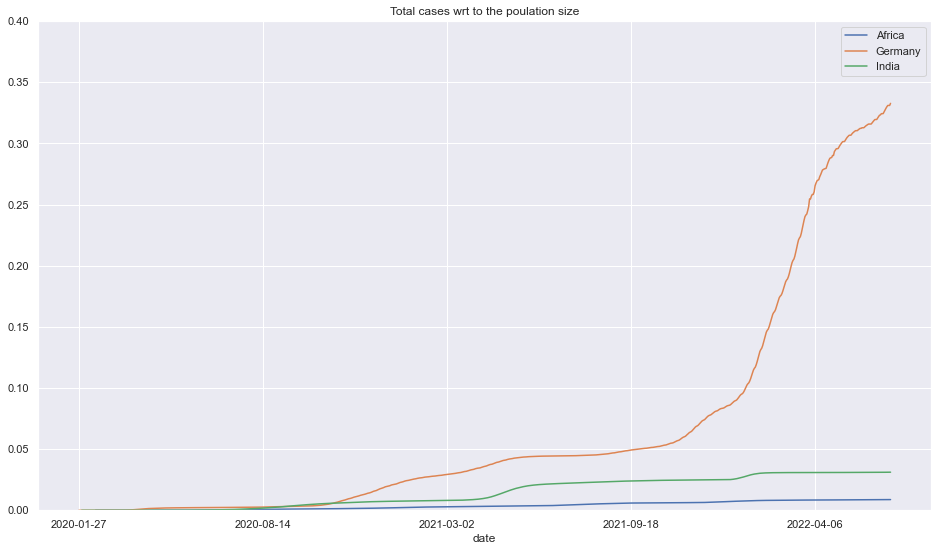

In [13]:
#Plot relative cases data

ax=three_country_data.set_index('date').plot()

plt.ylim(0, 0.4) #adjust y scale
plt.title("Total cases wrt to the poulation size")

In [14]:
# Interactive plot for relative covid cases
fig_cases = go.Figure()
for each in required_countries:
    fig_cases.add_trace(go.Scatter(x=three_country_data.date,y=three_country_data[each],name=each,))

#define the overall layout properties
fig_cases.update_layout(width=1024,height=900,title="COVID cases with respect to the population size",xaxis_title="Time", 
                  yaxis_title="Cases per population size",xaxis_rangeslider_visible=True,title_font_size=20)

# Chrome="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
# web.register('chrome', None,web.BackgroundBrowser(Chrome))
# fig_cases.show(renderer= 'chrome')
fig_cases.show()

## Vaccination Rate

In [1]:
#get required columns from all columns
required_columns = ['location','date','people_fully_vaccinated_per_hundred']
vaccine_data = raw_country_data[required_columns]
vaccine_data.tail()

NameError: name 'raw_country_data' is not defined

In [39]:
#restructure and filter data
vaccine_data=vaccine_data.pivot(index='date', columns='location', values='total_vaccinations_per_hundred')
vaccine_data = vaccine_data.filter(items=required_countries, axis=1)
vaccine_data=vaccine_data.reset_index().rename_axis(None, axis=1)
vaccine_data.tail()

,date,Africa,Germany,India
904,2022-06-23,38.49,217.63,141.05
905,2022-06-24,38.49,217.68,141.16
906,2022-06-25,38.49,217.69,141.28
907,2022-06-26,38.49,217.70,141.37
908,2022-06-27,38.49,NaN,141.41


Text(0.5, 1.0, 'Total vaccinations over time')

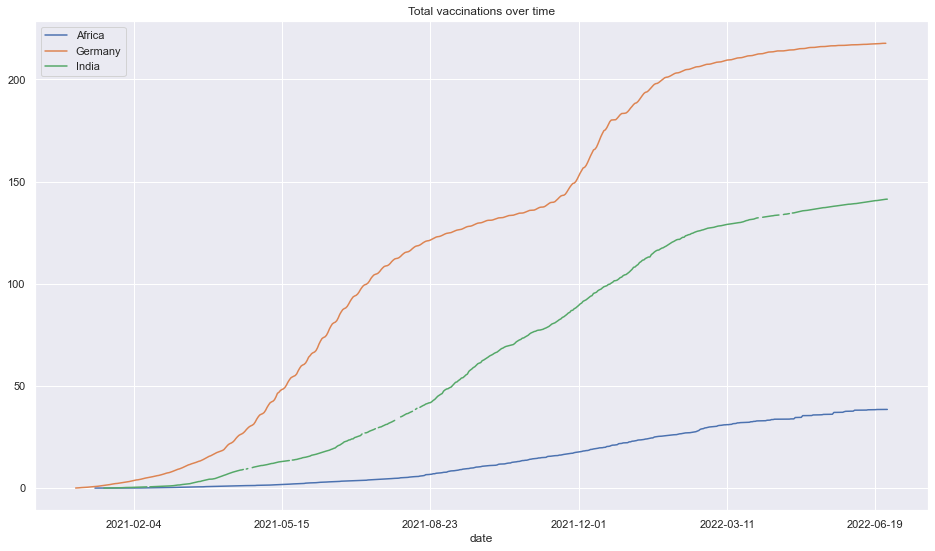

In [40]:
#Plot vaccination data

ax=vaccine_data.set_index('date').plot()

#plt.ylim(0, 100) #adjust y scale
plt.title("Total vaccinations over time")

In [41]:
#create a figure object for vaccination data
fig= go.Figure()
for each in required_countries:
    fig.add_trace(go.Scatter(x=vaccine_data.date,y=vaccine_data[each],name=each,))

#define the overall layout properties
fig.update_layout(width=1024,height=900,title="Total vaccinations per hundred persons",
                  xaxis_title="Time", 
                  yaxis_title="Vaccines per hundred",xaxis_rangeslider_visible=True, title_font_size=20, 
                 )

# Chrome="C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"
# web.register('chrome', None,web.BackgroundBrowser(Chrome))
# fig.show(renderer= 'chrome')
fig.show()
#plt.savefig('plt_vaccination_rate.png')